# Data Unsupervised & Supervised

- Supervised learning yang terbagi menjadi classification dan regression
- Unsupervised yang terbagi menjadi clustering, pendeteksian anomali, dan pengurangan dimensi.

## Supervised Learning

### Klasifikasi

- Klasifikasi, adalah teknik untuk menentukan kelas atau kategori berdasarkan atribut yang diberikan
- Klasifikasi terbagi lagi menjadi dua yaitu klasifikasi biner dan klasifikasi multi-kelas.
- biner, terdapat hanya 2 kelas pada dataset
- multi kelas adalah klasifikasi bagian-bagian dari wajah

### Decision Tree

- dipakai untuk masalah klasifikasi dan regresi.
- mampu dipakai dalam masalah yang kompleks
- Decision tree memprediksi sebuah kelas(klasifikasi) atau nilai(regresi) berdasarkan aturan-aturan yang dibentuk setelah mempelajari data.
- Decision tree juga merupakan komponen pembangun utama algoritma Random Fores

<https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052>

### Latihan SKLearn Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris
iris = pd.read_csv('sample_data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.drop('Id',axis=1,inplace=True)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)
# melakukan prediksi
# tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "predict_result/iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

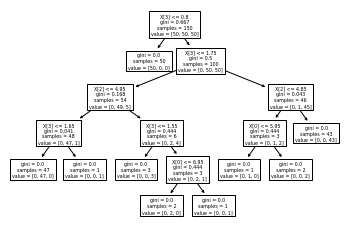

In [4]:
from sklearn.tree import plot_tree
plot_tree(tree_model)

### Regression

-  model regresi memprediksi bilangan kontinu
-  Bilangan kontinu adalah bilangan numerik. 

Macam - macam regresi

- Linear Regression cocok dipakai ketika terdapat hubungan linear pada data.
- Logistic Regression bekerja dengan menghitung probabilitas kelas dari sebuah sampel dan salah satu metode yang umum digunakan untuk klasifikasi

<https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/>

### Latihan SKLearn Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

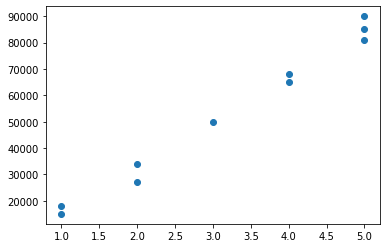

In [6]:
# menampilkan scatter plot dari dataset
%matplotlib inline
plt.scatter(bedrooms, house_price)

In [7]:
from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

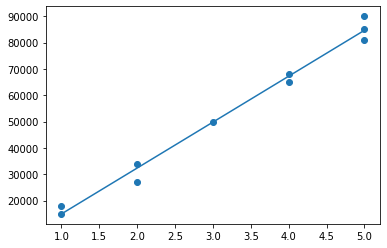

In [8]:
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

### Latihan SKLearn - Logistic Regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [12]:
# create x and y data
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [13]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# train the model
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# predict score using test data
model.score(X_test, y_test)

0.63

## Unsupervised : Clustering

- Klaster adalah sebuah grup yang memiliki kemiripan tertentu.
- Pengklasteran adalah sebuah metode machine learning unsupervised untuk mengelompokkan objek-objek yang memiliki kemiripan, ke dalam sebuah klaster
- dataset yang digunakan model clustering tidak memiliki label.
- Sebuah model pengklasteran, akan membandingkan atribut setiap pengunjung lalu membuat sebuah cluster yang diisi oleh pengunjung yang memiliki kemiripan karakteristik/atribut yang tinggi.

### K-Means Clustering

- Lloyd menggunakan metode ini untuk mengubah sinyal analog menjadi sinyal digital.
- Proses pengubahan sinyal ini juga dikenal sebagai Pulse Code Modulation.
- k-means bekerja dengan menentukan centroid secara acak, lalu memindahkan centroid sampai posisi centroid tidak berubah

![K-Means](https://dicodingacademy.blob.core.windows.net/academies/20200430210910083da271ef7a7cfea4ea263f83ceae63.gif "How K-Means work")

#### Metode Elbow

- Cara paling mudah untuk menentukan jumlah K atau cluster pada K-means adalah dengan melihat langsung persebaran data.
- Ide mendasar dari metode elbow adalah untuk menjalankan K-Means pada dataset dengan nilai K pada jarak tertentu (1,2,3, .., N). Kemudian hitung inersia pada setiap nilai K. Inersia memberi tahu seberapa jauh jarak setiap sampel pada sebuah cluster. Semakin kecil inersia maka semakin baik karena jarak setiap sampel pada sebuah klaster lebih berdekatan.

### Latihan SKLearn K-means

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
#ubah file csv menjadi dataframe
df = pd.read_csv('sample_data/Mall_Customers.csv')
# tammpilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [28]:
# preprocessing

# ubah namma kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [29]:
from sklearn.cluster import KMeans
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

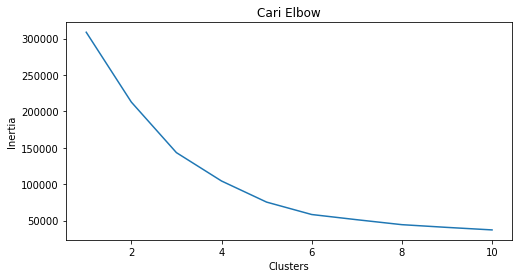

In [30]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

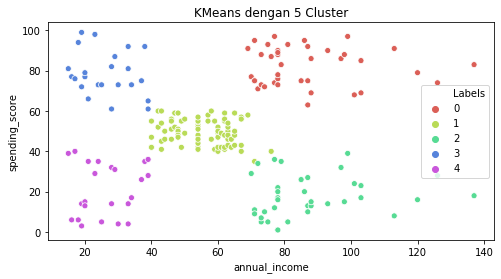

In [31]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

### Dimensionality Reduction: LDA, PCA, t-SNE

- Dengan begitu banyaknya atribut, proses pelatihan akan menjadi lambat dan memakan waktu yang lama.
- Diperlukan pengurangan dimensi dalam pengaplikasiannya di dunia nyata

#### Principal Component Analysis (PCA)

- mengurangi jumlah atribut pada dataset tanpa mengurangi informasi.
- bekerja dengan menghitung variance dari tiap atribut
- mencari variance tertinggi

#### Linear Discriminant Analysis (LDA)

- analisis diskriminan linier adalah teknik statistika yang dipakai untuk reduksi dimensi
- bekerja dengan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas pada dataset
- mencari variance terendah

<https://sebastianraschka.com/Articles/2014_python_lda.html>

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)

- mengurangi dimensi dengan menjaga sampel-sampel yang mirip agar berdekatan, dan sampel-sampel yang kurang mirip berjauhan.

<https://www.youtube.com/watch?v=wvsE8jm1GzE&t=103s>

### Latihan SKLearn PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [51]:
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2)

In [52]:
# menggunakan model Decision Tree dan menghitung berapa akurasinya tanpa menggunakan PCA.
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.8

In [53]:
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.93759509, 0.04153068, 0.0159316 , 0.00494263])

In [54]:
# Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [55]:
# menguji akurasi dengan PCA
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

# Dari percobaan di atas bisa kita lihat 
# bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi.
# namun hal ini bergantung kepada dataset dan faktor lainnya

0.8